# Importing necessary modules

In [1]:
# Import necessary modules
import matplotlib.pyplot as plt
import random
import math
import numpy as np

# Phase1

In [2]:
def compute_fitness(portfolio):
    bast= np.sum(np.dot(portfolio, mu)) - Rf
    Maqam = 0
    for i in range(N):
        Maqam += portfolio[i] * portfolio[i] * cov_matrix[i,i]
        for j in range(i+1, N): 
            Maqam += 2 * portfolio[i] * portfolio[j] * cov_matrix[i,j]
    fitness = bast / np.sqrt(Maqam)
    return fitness

def Create_Initial_Population(N):
    init_pop_table = np.random.rand(100, N)
    for i in range(len(init_pop_table)):
        init_pop_table[i] = repair_assets(init_pop_table[i])
    return init_pop_table

##restrictions of weights
def repair_assets(weights):
    for i in range(N):
        if weights[i]<0:
            weights[i]=0
        if weights[i] > 1:
            weights[i] = 1
    normalized_weights = weights / np.sum(weights)
    return normalized_weights

def Report(init_pop_table):
    report_table = dict()
    for i in range(len(init_pop_table)):
       print('| No: ',(i+1),'  Weights: ', init_pop_table[i], ' Fittness:  ', round(compute_fitness(init_pop_table[i]), 3), '   |')
    print(report_table)



Rf = 0.05 
mu = np.array([0.05, 0.1, 0.12, 0.18]) 
cov_matrix = np.array([
    [0.0064, 0.00408, 0.00192, 0],
    [0.00408, 0.0289, 0.0204, 0.0119],
    [0.00192, 0.0204, 0.0576, 0.0336],
    [0, 0.0119, 0.0336, 0.1225]
])
N = 4


init_pop_table = Create_Initial_Population(N)    
Report(init_pop_table)

| No:  1   Weights:  [0.32207575 0.27973532 0.31847137 0.07971756]  Fittness:   0.363    |
| No:  2   Weights:  [0.12458588 0.45591207 0.20832167 0.21118038]  Fittness:   0.421    |
| No:  3   Weights:  [0.32986309 0.22141271 0.13531596 0.31340824]  Fittness:   0.416    |
| No:  4   Weights:  [0.03850198 0.4704604  0.12581985 0.36521777]  Fittness:   0.437    |
| No:  5   Weights:  [0.36177425 0.34907654 0.19020254 0.09894667]  Fittness:   0.372    |
| No:  6   Weights:  [0.51137065 0.14130717 0.01481302 0.33250916]  Fittness:   0.383    |
| No:  7   Weights:  [0.21193372 0.40259486 0.34910082 0.0363706 ]  Fittness:   0.348    |
| No:  8   Weights:  [0.66580214 0.17107392 0.08942338 0.07370057]  Fittness:   0.285    |
| No:  9   Weights:  [0.31535418 0.25006915 0.15051804 0.28405863]  Fittness:   0.418    |
| No:  10   Weights:  [0.14246851 0.26536341 0.25500719 0.33716089]  Fittness:   0.426    |
| No:  11   Weights:  [0.48692766 0.13863847 0.21646431 0.15796956]  Fittness:   0.376   

# Phase2

In [3]:
# Global variables for the population
population = [] # List to store solutions in the population
population_fitness = [] # List to store fitness values corresponding to each solution

# Global problem parameters
budget = 250000
N = 10
Rf = 0.06
mu = [0.003, 0.003, 0.001, 0.006, 0.002, 0.001,
      0.0004, 0.01, 0.004, 0.02]
cov_matrix = [
    [0.000229, 0.000028, -0.000005, 0.000015, -0.000017,
        0.000000, -0.000004, -0.000089, 0.000022, -0.000003],
    [0.000028, 0.000302, 0.000017, 0.000013, -0.000003,
        0.000002, -0.000003, 0.000053, 0.000002, -0.000004],
    [-0.000005, 0.000017, 0.001759, -0.000016, 0.000011,
        0.000000, -0.000029, -0.004438, 0.000044, 0.000007],
    [0.000015, 0.000013, -0.000016, 0.015125, 0.000181,
        0.003710, -0.000040, -0.000431, 0.000143, 0.000023],
    [-0.000017, -0.000003, 0.000011, 0.000181, 0.000300,
        0.000061, -0.000015, 0.000341, -0.000006, 0.000008],
    [0.000000, 0.000002, 0.000000, 0.003710, 0.000061,
        0.001209, -0.000012, -0.000092, 0.000033, 0.000018],
    [-0.000004, -0.000003, -0.000029, -0.000040, -0.000015, -
        0.000012, 0.000305, 0.000158, -0.000004, 0.000025],
    [-0.000089, 0.000053, -0.004438, -0.000431, 0.000341, -
        0.000092, 0.000158, 0.092052, -0.000040, 0.000019],
    [0.000022, 0.000002, 0.000044, 0.000143, -0.000006,
        0.000033, -0.000004, -0.000040, 0.000149, 0.000007],
    [-0.000003, -0.000004, 0.000007, 0.000023, 0.000008,
        0.000018, 0.000025, 0.000019, 0.000007, 0.000322],
]

# Genetic Algorithm

In [4]:
# Choose parent based on fitness
def choose_parent():
    parent1 = random.randint(0, len(population)-1)
    parent2 = random.randint(0, len(population)-1)
    if population_fitness[parent1] > population_fitness[parent2]:
        return parent1
    else:
        return parent2


# Create an initial population
def create_initial_population(pop_size, solutionLen):
    population = []
    for x in range(pop_size):
        weights = [random.uniform(0, 1) for _ in range(solutionLen)]
        total_weight = sum(weights)
        normalized_weights = [w / total_weight for w in weights]
        population.append(normalized_weights)
    return population

#single-point crossover
def crossover(parent1, parent2):
    point = random.randint(0, len(parent1)-1)
    child1, child2 = [], []
    for i in range(len(parent1)):
        if i < point:
            child1.append(parent1[i])
            child2.append(parent2[i])
        else:
            child1.append(parent2[i])
            child2.append(parent1[i])

    return child1, child2


#mutation
def mutation(solution, mutation_count):
    new_solution = solution.copy()
    while mutation_count > 0:
        p = random.randint(0, len(solution)-1)
        new_solution[p] = random.random()
        mutation_count -= 1
    return new_solution

# Replace the weakest solution from the population
def replace_weakest(solution, fitness):
    global population
    global population_fitness
    weakest = population_fitness.index(min(population_fitness))
    # if child has a higher fitness value then replace the weakest
    if population_fitness[weakest] < fitness:
        population[weakest] = solution
        population_fitness[weakest] = fitness


def genetic_algorithm(popSize, solutionLen, mutationCount, canCrossover):
    global population
    global population_fitness
    population = create_initial_population(popSize, solutionLen)
    fitness_calls = 10000
    # Initialize fitness values for the initial population
    for i in population:
        fitness_calls = fitness_calls - 1
        population_fitness.append(compute_fitness(i))

    generation_number = 1
    x, y = [], []
    while fitness_calls > 0:
        par1 = population[choose_parent()]
        par2 = population[choose_parent()]

        # Initialize children with parents
        child1, child2 = par1, par2
        if canCrossover:
            child1, child2 = crossover(par1, par2)

        # Apply mutation to children
        child1 = mutation(child1, mutationCount)
        child2 = mutation(child2, mutationCount)

        # Repair solutions to ensure they are valid
        child1 = repair_function(child1)
        child2 = repair_function(child2)

        # Evaluate fitness for children
        child1_fitness = compute_fitness(child1)
        child2_fitness = compute_fitness(child2)
        fitness_calls -= 2

        # Replace weakest solutions in the population with the children
        replace_weakest(child1, child1_fitness)
        replace_weakest(child2, child2_fitness)

        x.append(generation_number)
        y.append(max(population_fitness))
        generation_number+=1

    plt.plot(x, y, linestyle='-', color='pink')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')
    plt.title('Genetic Algorithm Fitnesses over generations')
    
    # Identify the best solution in the final population
    best_index = population_fitness.index(max(population_fitness))
    solution = population[best_index]
    solution_fitness = population_fitness[best_index]
    return solution, solution_fitness


# Local Search

In [5]:
# Generate a random solution
def generate_solution(count):
    start_range = 1
    end_range = 1000
    random_array = random.choices(range(start_range, end_range + 1), k=count)
    total = sum(random_array)
    random_array = [round(element/total, 5) for element in random_array]
    random_array[0] = 1 - sum(random_array[1:])
    return random_array

# Generate the next random solution
def next_random_solution(solution):
    margin = 3/100
    for i in range(len(solution)):
        choice = random.randint(1, 2)
        if choice == 1:
            solution[i] += margin
    return solution


def local_search(count):
    repeated = 0
    tolerance = 1e-9
    best_solution = generate_solution(count)
    best_fitness = compute_fitness(best_solution)
    fitness_calls = 10000 - 1
    while fitness_calls > 0:
        next = next_random_solution(best_solution)
        next = repair_function(next)
        next_fitness = compute_fitness(next)
        fitness_calls -= 1

        # Update the best solution if the next solution has a higher fitness
        if next_fitness > best_fitness:
            best_solution = next
            best_fitness = next_fitness

        # Check for repeated fitness values to break the loop
        if math.isclose(best_fitness, next_fitness, rel_tol=tolerance, abs_tol=tolerance):
            repeated += 1
        else:
            repeated = 0

        # If the fitness value repeats for four consecutive iterations, generate a new random solution
        if repeated >= 5:
            new_solution = generate_solution(count)
            new_fitness = compute_fitness(new_solution)
            fitness_calls -= 1
            repeated = 0
            if new_fitness > best_fitness:
                best_solution = new_solution
                best_fitness = new_fitness

    return best_solution, best_fitness



# Main

Local Search: -0.9700622308445694
[0.10531, 0.13623, 0.10986, 0.09439, 0.14258, 0.07547, 0.06726, 0.06559, 0.09105, 0.11225]


Genetic Algorithm: -0.16725280936339987
[0.00311, 0.002, 0.00107, 0.00119, 0.00184, 1e-05, 0.00114, 0.98674, 0.00138, 0.00151]


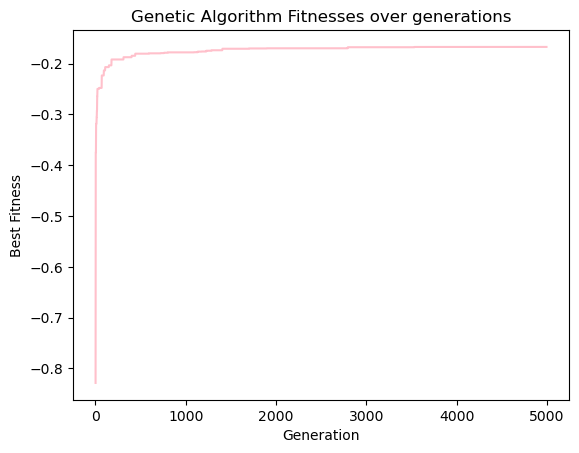

In [6]:
# Repair function to normalize the solution
def repair_function(solution):
    total = sum(solution)
    for i in range(len(solution)):
        solution[i] /= total
        solution[i] = round(solution[i], 5)
    return solution

# Compute fitness function for a given solution
def compute_fitness(solution):
    portfolio_return = sum(w * mu_i for w, mu_i in zip(solution, mu))
    portfolio_volatility = math.sqrt(sum(
        w_i * w_j * cov_matrix[i][j]
        for i, w_i in enumerate(solution)
        for j, w_j in enumerate(solution)
    ))
    # Fitness is calculated as the ratio of expected return to portfolio volatility
    fitness = (portfolio_return - Rf) / portfolio_volatility
    return fitness

# Main function
def main():
    global budget
    global N
    global Rf
    global mu
    global cov_matrix

    
    #local search
    solution, fitness = local_search(N)
    print(f"Local Search: {fitness}\n{solution}")

    print('\n')

    
    #Genetic Algorithm
    solution, fitness = genetic_algorithm(10, N, 1, True)
    print(f"Genetic Algorithm: {fitness}\n{solution}")



main()
plt.show()


